# Fraud Detection
---

## Importing libraries to work with Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data into Dataframe
df=pd.read_csv('Fraud.csv')

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


## Analysing and Preprocessing

In [4]:
# checking for null values
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


<Axes: >

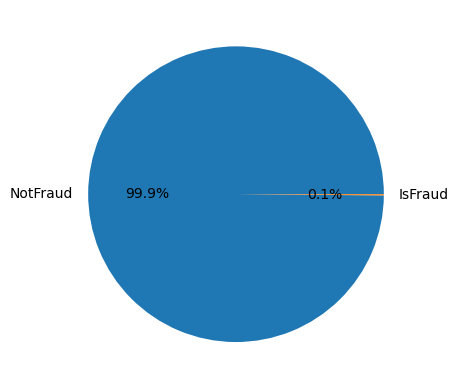

In [6]:
df['isFraud'].replace([0,1],['NotFraud','IsFraud']).value_counts().plot(kind='pie',autopct='%1.1f%%',label='')

The data is imbalanced and has only 0.1% cases of Fraud

#### Creating a new dataframe to edit and work with

In [7]:
changed=df.copy()

In [8]:
# dropping irrelevant column
changed.drop(['step'],axis=1,inplace=True)

### simplyfying the 'nameOrig' & 'nameDest' columns to just the first character

In [9]:
changed['nameDest']=changed['nameDest'].str[:1]
changed['nameOrig']=changed['nameOrig'].str[:1]

In [10]:
#determining the type of values in 'nameorig'
changed['nameOrig'].value_counts()

C    6362620
Name: nameOrig, dtype: int64

#### Since the value is constant 'nameOrig' it is an irrelevant variable

In [11]:
changed.drop(['nameOrig'],axis=1,inplace=True)

In [12]:
#determining the type of values in 'namedest'
changed['nameDest'].value_counts()

C    4211125
M    2151495
Name: nameDest, dtype: int64

<Axes: >

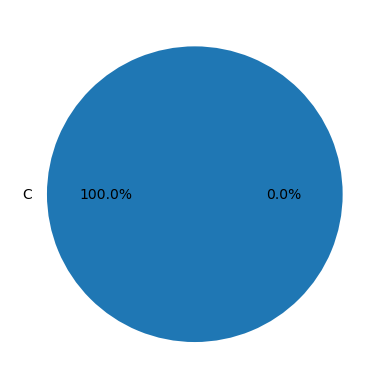

In [13]:
#determining relavance of 'nameDest'
changed.groupby(['nameDest'])['isFraud'].sum().plot(kind='pie',autopct='%1.1f%%',label='')

*high relevance, no merchant payments are fraud and thus this could be a good determining factor*

#### encoding 'nameDest' (1,0 for C,M respectively)

In [14]:
changed['nameDest'].replace(['C','M'],[1,0],inplace=True)

#### Encoding the type column

In [15]:
#encoding the type column
changed['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
changed['type']=label_enc.fit_transform(changed['type'])+1

In [17]:
changed

,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,4,9839.64,170136.00,160296.36,0,0.00,0.00,0,0
1,4,1864.28,21249.00,19384.72,0,0.00,0.00,0,0
2,5,181.00,181.00,0.00,1,0.00,0.00,1,0
3,2,181.00,181.00,0.00,1,21182.00,0.00,1,0
4,4,11668.14,41554.00,29885.86,0,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,2,339682.13,339682.13,0.00,1,0.00,339682.13,1,0
6362616,5,6311409.28,6311409.28,0.00,1,0.00,0.00,1,0
6362617,2,6311409.28,6311409.28,0.00,1,68488.84,6379898.11,1,0
6362618,5,850002.52,850002.52,0.00,1,0.00,0.00,1,0


In [18]:
# determining relevance of 'isFlaggedFraud'
df['isFlaggedFraud'].sum()

16

In [19]:
df.groupby(['isFraud'])['isFlaggedFraud'].sum()

isFraud
0     0
1    16
Name: isFlaggedFraud, dtype: int64

*high relevance, all the flagged ones are indeed fraud*

### Creating a correlation matrix

<Axes: >

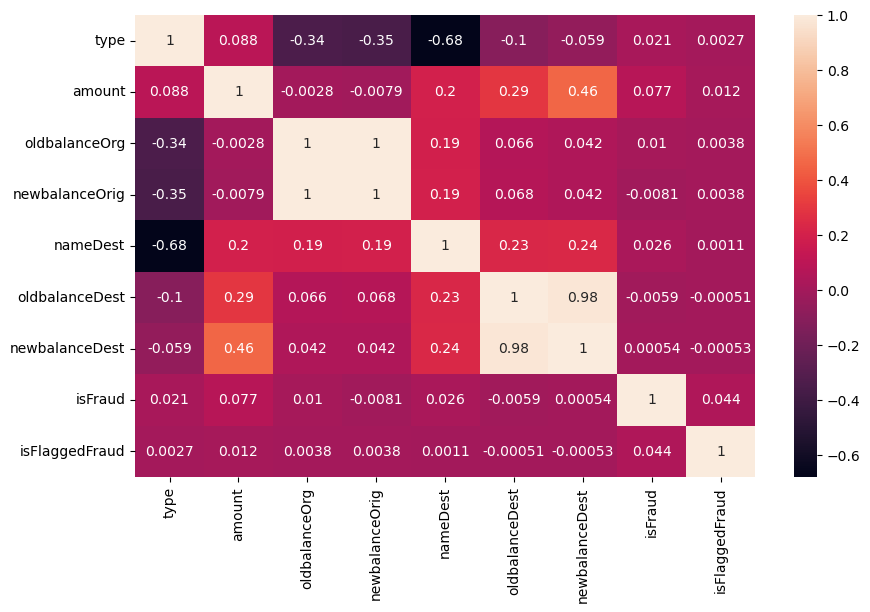

In [20]:
#Creating a correlation matrix
corr=changed.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

## Selecting Features

In [21]:
#selecting relevant features
x=changed[['type','amount','oldbalanceOrg','newbalanceOrig','nameDest','isFlaggedFraud']]

In [22]:
x.isna().sum()

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
isFlaggedFraud    0
dtype: int64

In [23]:
x

,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,isFlaggedFraud
0,4,9839.64,170136.00,160296.36,0,0
1,4,1864.28,21249.00,19384.72,0,0
2,5,181.00,181.00,0.00,1,0
3,2,181.00,181.00,0.00,1,0
4,4,11668.14,41554.00,29885.86,0,0
...,...,...,...,...,...,...
6362615,2,339682.13,339682.13,0.00,1,0
6362616,5,6311409.28,6311409.28,0.00,1,0
6362617,2,6311409.28,6311409.28,0.00,1,0
6362618,5,850002.52,850002.52,0.00,1,0


In [24]:
y=changed['isFraud']

## Model Selection and Training

In [25]:
#splitting data
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#### Logistic Regression Model

I've selcted LogisticRegression as the classification model for this assignment as it is very good at predicting binary output and working with varying data

In [27]:
from sklearn.linear_model import LogisticRegression
lrc=LogisticRegression()

In [28]:
%%time
#training the model
lrc.fit(x_train,y_train)

CPU times: total: 24.2 s
Wall time: 13.6 s


LogisticRegression()

## Evaluation

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
# prediction and score
y_pred=lrc.predict(x_test)
lrc.score(x_test,y_test)

0.9994766306961598

Accuracy score: 0.9994766306961598

Confusion Matrix:


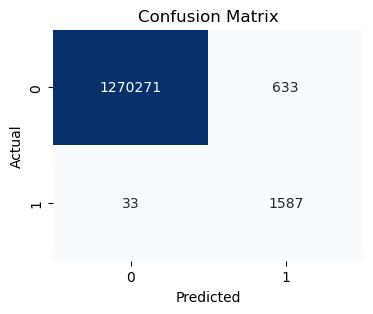


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.71      0.98      0.83      1620

    accuracy                           1.00   1272524
   macro avg       0.86      0.99      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524



In [31]:
# Calculate the accuracy using accuracy_score
accuracy = accuracy_score(y_test, y_pred)

# Creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Creating a classification report
report = classification_report(y_test, y_pred)

print("Accuracy score:", accuracy)

#plotting a heatmap of the confusion matrix
print("\nConfusion Matrix:")
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(report)

### Interpretting the Model
#### Model Feature coefficient

In [32]:
coeff_df = pd.DataFrame({'Feature': x.columns, 'Coefficient': lrc.coef_[0]})
print(coeff_df)

          Feature   Coefficient
0            type -2.866886e-06
1          amount -8.845515e-04
2   oldbalanceOrg  8.851487e-04
3  newbalanceOrig -9.643233e-04
4        nameDest -1.434750e-07
5  isFlaggedFraud  2.764504e-11


## Questions.
1. Data cleaning including missing values, outliers and multi-collinearity.
2. Describe your fraud detection model in elaboration.
3. How did you select variables to be included in the model?
4. Demonstrate the performance of the model by using best set of tools.
5. What are the key factors that predict fraudulent customer?
6. Do these factors make sense? If yes, How? If not, How not?
7. What kind of prevention should be adopted while company update its infrastructure?
8. Assuming these actions have been implemented, how would you determine if they work?

### 1. Data cleaning including missing values, outliers and multi-collinearity.
- The 'type' column was encoded to numerical value
- The 'nameOrig' and 'nameDest' elememts were changed to just their prefix letter.
- 'nameOrig' was dropped as it had a constant value.
- 'nameDest' was encode to numerical value.
- 'oldbalanceDest' and 'newbalanceDest' was dropped as it had no data for merchants.

### 2.Describe your fraud detection model in elaboration.

\* **Introduction:**
The purpose of this fraud detection model is to distinguish between legitimate and fraulent transaction by looking for patterns indicative of fraud. 

\* **Dataset Description:**
The dataset used to train the model contains historical transaction data from a financial institution. Each sample in the dataset represents a single transaction consisting of *step*, *amount*, *nameOrig*, *oldbalanceOrg*, *newbalanceOrig*, *nameDest*, *newbalanceDest*, *oldbalanceDest*, *isFraud*, *isFlaggedFraud* 

\* **Feature Selection**
['type','amount','oldbalanceOrg','newbalanceOrig','nameDest','isFlaggedFraud'] were selected for training. Based on EDA done with individual columns, correlation matrix, etc.

\* **Model Training:**
Logistic Regression algorithm was used for this fraud detection task. Logistic Regression is a widely-used classification algorithm that predicts the probability of a binary outcome with high accuracy, in this case the probability of a transaction being fraudulent or not.

\* **Model Evaluation:**
To evaluate the performance of the fraud detection model, the dataset is split into training and testing sets. Metrics such as accuracy, confusion matrix, precision, recall, F1-score(classification_report) are computed on the test set to assess the model's effectiveness in detecting fraudulent transactions.

The model has overall accuracy of ***99.94%***. It has high precision(1), recall(1) and f1-score(1) in detecting non-fraud transaction and has low precision(0.71), with high recall(0.98), f1-score(0.83) for detecting fraud transaction although it has high recall detecting ***98%*** of fraud cases and considering the false positive was just ***0.05%*** of actual non-fraud it makes the low precision rating insignificant

\* **Interpretting the Model**
The models coefficients provide insights into the impact of each feature on the probability of fraud. 
The **'oldbalanceOrg'** column has a high positive coefficient of ***8.85e-04*** indicating a higher initial account balance is associated with a higher likelihood of fraud. 
The **'amount'** column has the highest negative coefficient of ***-8.85e-04*** indicating that lesser fraud happen of higher transaction amount.


\* **Limitations:**
While Logistic Regression is interpretable and performs really well in predicting binary output, it might have limitations in capturing complex relationships between features. In cases where interactions between features are non-linear eg('type','nameDest'), more sophisticated models like Random Forests, Gradient Boosting Machines, or Neural Networks may be more suitable.

\* **Future Improvements:**
To enhance the model's performance, further exploration of other machine learning algorithms and ensemble methods can be considered.(I couldn't because of GPU processing power limitations on my end)

\* **Conclusion:**
This Logistical Regression Model is capable of categorising transaction with an accuracy of ***99.94%*** and predicting ***98%*** of the fraud transactions. It mainly focuses on 'oldbalanceOrg', 'newbalanceOrig' and 'amount' to draw the prediction. This model can help financial institutions take premptive measures by predicting and stopping frauds before they happen. 

### 3.How did you select variables to be included in the model?
The features were selected based on EDA performed using methods like correlation matrix, summary statistics, data visualisation, etc
- The 'step' variable was redundant log data.
- The 'type' data was encoded to value 1-5 and selected for training
- The 'nameOrig' variable was dropped after determininig that it was constant. Additionally all values prefixed 'C' which I believe stands for customer, so furthermore I didn't want to include it (by just adding the id number after the prefix) because that might lead to targeted bias towards particular customers
- The 'oldbalanceOrg' variable was used in training as it had high coeffeciency and it was a linear data which is good data for Logistic Regression Models.
- The 'newbalanceOrig' was also selected for the same reason as 'oldbalanceOrg'
- The 'nameDest' was simplified and categorised into 'C & M' and kept as there was no Fraud transaction under 'Merchant(M)' tranaction which is a direct idicative of non-fraud transaction.
- The new and old balance of destination was dropped due to unavailibliy of data for merchants.
- The isFlaggedFraud was kept as all flagged transaction were 'Fraud' making it a direct indicative of fraud.


### 4.Demonstrate the performance of the model by using best set of tools.
The model achieved an impressive overall accuracy score of ***99.94%.*** It demonstrates high precision, recall, and F1-score in detecting non-fraudulent transactions, indicating its ability to correctly identify genuine transactions. On the other hand, the model shows a lower precision (0.71) but a significantly higher recall (0.98) and F1-score (0.83) for detecting fraudulent transactions.

The high recall for fraud detection suggests that the model can correctly detect nearly ***98%*** of all actual fraud cases. This is a crucial aspect for a fraud detection system as missing fraudulent transactions can have severe consequences thus higher recall was given preferrence. Additionally, the low precision for fraud detection (0.71) means a higher false positive prediction. However, the actual false positives represent just ***0.05%*** of the total non-fraudulent cases, making the impact of false positives relatively insignificant.

In summary, the model's prioritization of recall over precision for fraud detection indicates a robust ability to identify a vast majority of fraudulent transactions while maintaining a very high accuracy in classifying non-fraudulent transactions. The trade-off between precision and recall aligns well with the fraud detection objective, making the model highly effective in catching potential fraud cases. The model's performance indicates a strong foundation for its practical application in real-world scenarios.

Here's the table and data showing the same.

Accuracy score: 0.9994766306961598

Confusion Matrix:


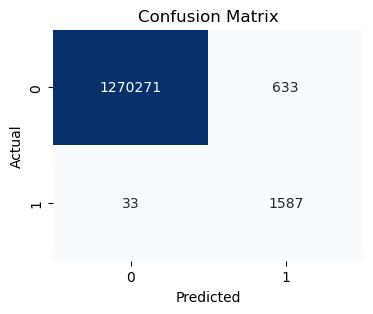


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.71      0.98      0.83      1620

    accuracy                           1.00   1272524
   macro avg       0.86      0.99      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524



In [33]:
# Calculate the accuracy using accuracy_score
accuracy = accuracy_score(y_test, y_pred)

# Creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Creating a classification report
report = classification_report(y_test, y_pred)

print("Accuracy score:", accuracy)

#plotting a heatmap of the confusion matrix
print("\nConfusion Matrix:")
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(report)

### 5.What are the key factors that predict fraudulent customer?
From Interpretting the model it's shown that 'oldbalanceOrg', 'newbalanceOrig' and 'amount' are the key factors as they have the highest feature coeffecient.

### 6.Do these factors make sense? If yes, How? If not, How not?
Yes, these factors make sense for the follwing reasons:
- 'oldbalanceOrg' shows that accounts with higher balance are often targeted probably because they present a more lucrative opportunity to maximize their gains. It also gives a chance to not be noticed, as small change in big number could be easily missed by the victim.
- 'amount' shows that most fraudsters tend to keep the fraudulent transaction amounts moderate rather than attempting extremely large amount fraudulent transactions. There could be several reasons for this behavior such as 'Avoiding Detection', 'Bypassing Authorization Limits',etc.
- 'newbalance' this is a factor that is directly connected to and affected by oldbalance and amount. It is also possible to notice discrepancies in newbalance compared to what it should be.

### 7.What kind of prevention should be adopted while company update its infrastructure?
When a company updates its infrastructure to include a model, several prevention measures needs to be taken such as:
- Testing and Validation: Before deploying the model in the production environment, test and validate its performance on a separate staging environment. Verify that the model produces accurate and reliable results and that it aligns with the intended business objectives.
- Data Security and Privacy: If the data used for the model contains sensitive information, take necessary measures to secure the data and comply with data privacy regulations. Implement access controls and encryption protocols to safeguard the data.
- Scalability Considerations: Depending on the anticipated usage and workload, ensure that the infrastructure supporting the model is scalable. This allows the company to handle increased demand without compromising performance.
- Safe Disposing: Disposing off old system should be done carefully as it could still contain sensitive information which can be used to better chose vulnerable targets.

### 8.Assuming these actions have been implemented, how would you determine if they work?
To determine if the actions implemented work, one can use a combination of testing, monitoring, and evaluation methods.
- Testing and Validation: Conduct testing and validation of the entire updated infrastructure and the integrated model. Ensure that all components are functioning as expected and that the model is providing accurate and reliable predictions. 
- Comparison with Baselines: Compare the performance of the updated infrastructure and the logistic regression model with the baselines established before the update. 
- User Feedback and Acceptance: Gather feedback from users who interact with the updated infrastructure and the model to ensure that the changes have met their needs and expectations.

### A model is sucessfully created that predicts fraudulent transaction in a financial organisation with high accuracy.

***— Simon Nadar***